In [3]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])

if (not.installed("MASS"))  install.packages("MASS")  # we need the MASS package

library(MASS)  #  load the MASS package

In [4]:
data(Boston)
head(Boston)
nrow(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


[1] 506

In [5]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
    
if (not.installed("DAAG")) install.packages("DAAG", repos="http://cran.us.r-project.org")

library(DAAG)

Loading required package: lattice

Attaching package: ‘DAAG’

The following object is masked from ‘package:MASS’:

    hills



In [6]:
# simple linear regression
fit = lm(medv ~ ., data=Boston)
# plot(fit)

In [7]:
not.installed <- function(pkg) !is.element(pkg, installed.packages()[,1])
    
if (not.installed("caret")) install.packages("caret", repos="http://cran.us.r-project.org")

library(caret)

Loading required package: ggplot2


### linear regression - caret

In [8]:
# lmFit <- train(medv ~ .,
#                data = Boston,
#                method = "lm",
#                trControl = trainControl(method = "cv"))
# print(lmFit)
# summary(lmFit)

In [9]:
# residuals(lmFit)

In [10]:
# fitted_value = fitted(lmFit)

In [11]:
# actual_value = Boston$medv
# head(Boston)

In [12]:
# plot(medv~zn+crim, data=Boston)
# plot(Boston$zn+Boston$crim+Boston$indus+Boston$chas+Boston$nox+Boston$rm+Boston$age+Boston$dis+Boston$rad+Boston$tax+Boston$ptratio+Boston$black+Boston$lstat, Boston$medv)

# abline(lm(Boston$medv~Boston$zn+Boston$crim+Boston$indus+Boston$chas+Boston$nox+Boston$rm+Boston$age+Boston$dis+Boston$rad+Boston$tax+Boston$ptratio+Boston$black+Boston$lstat))

### linear regression

In [13]:
if (not.installed("hydroGOF")) install.packages("hydroGOF", repos="http://cran.us.r-project.org")
library(hydroGOF)

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [16]:
k.folds <- function(k) {
    folds <- createFolds(Boston$medv, k = k, list = TRUE, returnTrain = TRUE)
    for (i in 1:k) {
        model <- lm(medv ~ ., data=Boston[folds[[i]],])
        predictions <- predict(object=model, newdata=Boston[-folds[[i]],])
#         all_predictions <- c(all_predictions, predictions)
        err <- c(err, rmse(predictions,Boston[-folds[[i]],]$medv))
        print(summary(model))
    }
#     all_predictions
    err
}

set.seed(100)
err <- c()
# all_predictions <- c()
err <- k.folds(10)
err
# folds <- createFolds(Boston$medv, k = 2, list = TRUE, returnTrain = TRUE)
# for (i in 1:2) {
#     model <- lm(medv ~ ., data=Boston[folds[[i]],])
#     predictions <- predict(object=model, newdata=Boston[-folds[[i]],])
#     print(rmse(predictions,Boston[-folds[[i]],]$medv))
# }


Call:
lm(formula = medv ~ ., data = Boston[folds[[i]], ])

Residuals:
     Min       1Q   Median       3Q      Max 
-14.4979  -2.6954  -0.6223   1.6955  26.3884 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  39.299107   5.364801   7.325 1.14e-12 ***
crim         -0.107616   0.032964  -3.265  0.00118 ** 
zn            0.038202   0.014566   2.623  0.00902 ** 
indus         0.048858   0.065884   0.742  0.45873    
chas          2.004917   0.875274   2.291  0.02246 *  
nox         -20.058391   3.942680  -5.088 5.38e-07 ***
rm            3.770632   0.433684   8.694  < 2e-16 ***
age          -0.002738   0.013628  -0.201  0.84088    
dis          -1.454127   0.209666  -6.935 1.45e-11 ***
rad           0.317436   0.069469   4.569 6.36e-06 ***
tax          -0.012816   0.003966  -3.232  0.00132 ** 
ptratio      -1.010050   0.139386  -7.246 1.93e-12 ***
black         0.008169   0.002781   2.937  0.00349 ** 
lstat        -0.510533   0.052566  -9.712  < 2e-16 *

[1] 5.112286 5.162387 5.410737 5.717539 5.516167 4.615891 4.541385 4.146089
 [9] 3.715148 4.480979

In [15]:
mean.rmse <- mean(err)
mean.rmse

[1] 4.841861

### Visualization

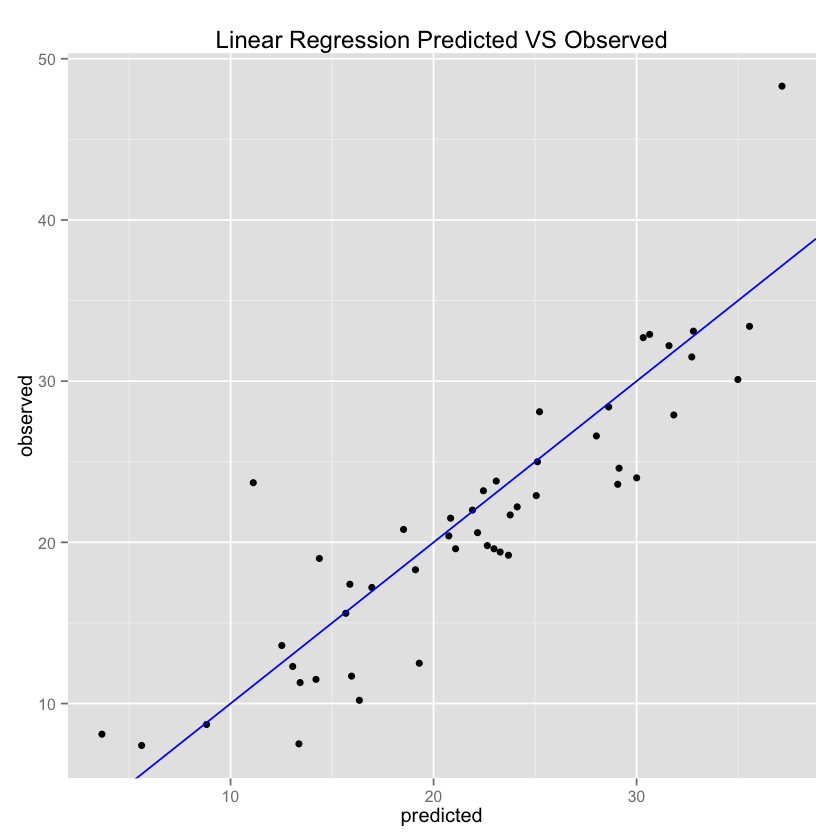

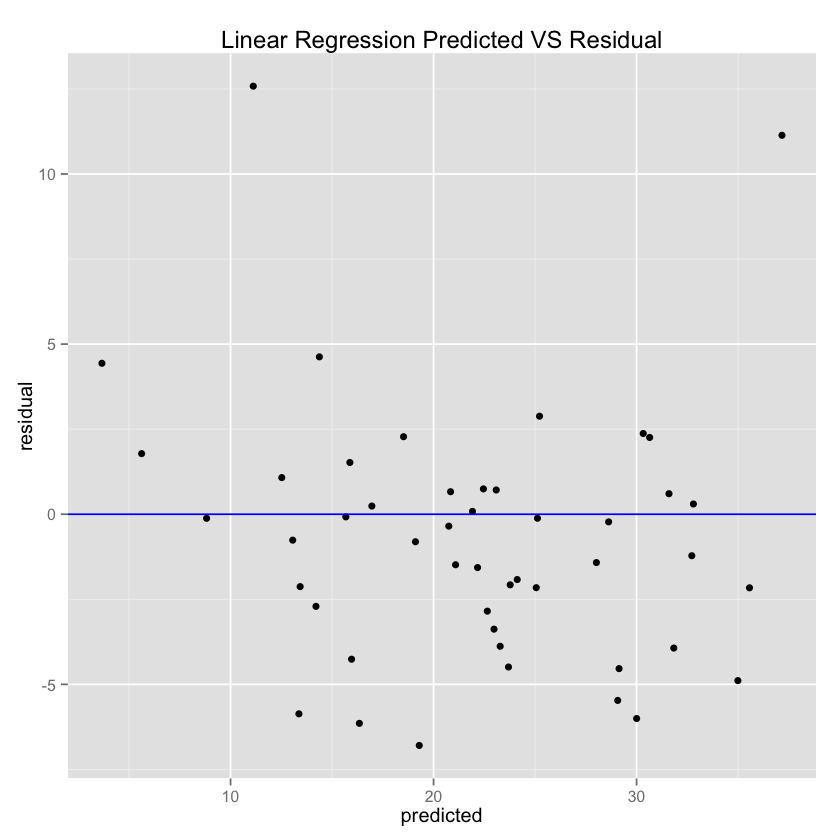

In [45]:
# visulization the performance of the model
# library(ggplot2)
# df_lm <- data.frame(predicted = lmPred, observed = testset$medv)
# ggplot(df_lm, aes(x = predicted, y = observed)) +
#   geom_point() +
#   geom_abline(intercept = 0, slope = 1, colour = "blue") +
#   ggtitle("Linear Regression Predicted VS Observed")

# df_lm2 <- data.frame(predicted = lmPred, residual = testset$medv - lmPred)
# ggplot(df_lm2, aes(x = predicted, y = residual)) +
#   geom_point() +
#   geom_hline(yintercept = 0, colour = "blue") +
#   ggtitle("Linear Regression Predicted VS Residual")


## Repeat the step for part 3

### Polynomial Regression 

In [24]:
polyFit <- lm(medv ~ lstat + I(lstat^2), data = Boston)
summary(polyFit)


Call:
lm(formula = medv ~ lstat + I(lstat^2), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2834  -3.8313  -0.5295   2.3095  25.4148 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 42.862007   0.872084   49.15   <2e-16 ***
lstat       -2.332821   0.123803  -18.84   <2e-16 ***
I(lstat^2)   0.043547   0.003745   11.63   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.524 on 503 degrees of freedom
Multiple R-squared:  0.6407,	Adjusted R-squared:  0.6393 
F-statistic: 448.5 on 2 and 503 DF,  p-value: < 2.2e-16


In [27]:
polyFit3 <- lm(medv ~ poly(lstat,5), data = Boston)
summary(polyFit3)


Call:
lm(formula = medv ~ poly(lstat, 5), data = Boston)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5433  -3.1039  -0.7052   2.0844  27.1153 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       22.5328     0.2318  97.197  < 2e-16 ***
poly(lstat, 5)1 -152.4595     5.2148 -29.236  < 2e-16 ***
poly(lstat, 5)2   64.2272     5.2148  12.316  < 2e-16 ***
poly(lstat, 5)3  -27.0511     5.2148  -5.187 3.10e-07 ***
poly(lstat, 5)4   25.4517     5.2148   4.881 1.42e-06 ***
poly(lstat, 5)5  -19.2524     5.2148  -3.692 0.000247 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.215 on 500 degrees of freedom
Multiple R-squared:  0.6817,	Adjusted R-squared:  0.6785 
F-statistic: 214.2 on 5 and 500 DF,  p-value: < 2.2e-16


### Plot RMSE for a fixed training and test set

In [32]:
# Split the data
set.seed(5566)
train_index <- createDataPartition(Boston$medv, p = .8, list = FALSE)
trainset <- Boston[train_index, ]
testset <- Boston[-train_index, ]

In [65]:
rmse_value <- c()
for(i in 1:15) {
    poly_model <- lm(medv ~ poly(lstat,i), data = trainset)
    poly_pred <- predict(poly_model, testset)
    err <- postResample(pred = poly_pred, obs = testset$medv)
    rmse_value <- c(rmse_value, err['RMSE'])
}
rmse_value

RMSE     RMSE     RMSE     RMSE     RMSE     RMSE     RMSE     RMSE 
5.747603 5.036123 4.689110 4.492013 4.338300 4.328564 4.326645 4.358158 
    RMSE     RMSE     RMSE     RMSE     RMSE     RMSE     RMSE 
4.312699 4.970973 4.809056 5.660471 6.298408 5.403646 7.545760

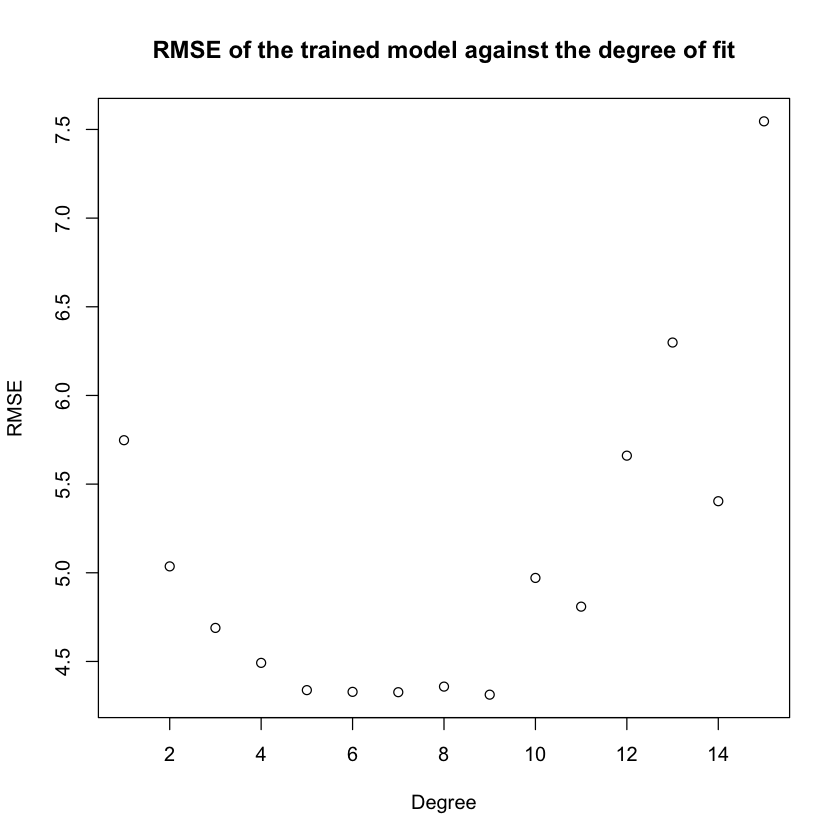

In [68]:
plot(c(1:15),rmse_value, main="RMSE of the trained model against the degree of fit", ylab="RMSE", xlab="Degree")

### Plot RMSE for the average RMSE using cross validation - using caret

In [82]:
rmse_value2 <- c()
for(i in 1:15) {
    polyLmFit <- train(medv ~ poly(lstat,i),
               data = Boston,
               method = "lm",
               trControl = trainControl(method = "cv"))
    rmse_value2 <- c(rmse_value2, polyLmFit$results['RMSE'])
}
rmse_value2

# polyLmFit <- train(medv ~ poly(lstat,5),
#                data = Boston,
#                method = "lm",
#                trControl = trainControl(method = "cv"))
# polyLmFit$results['RMSE']
# summary(polyLmFit)

$RMSE
[1] 6.219364

$RMSE
[1] 5.449237

$RMSE
[1] 5.350635

$RMSE
[1] 5.335345

$RMSE
[1] 5.20632

$RMSE
[1] 5.207948

$RMSE
[1] 5.186408

$RMSE
[1] 5.277262

$RMSE
[1] 5.261478

$RMSE
[1] 5.24363

$RMSE
[1] 5.640664

$RMSE
[1] 6.444867

$RMSE
[1] 38.1087

$RMSE
[1] 8.989729

$RMSE
[1] 10.32557

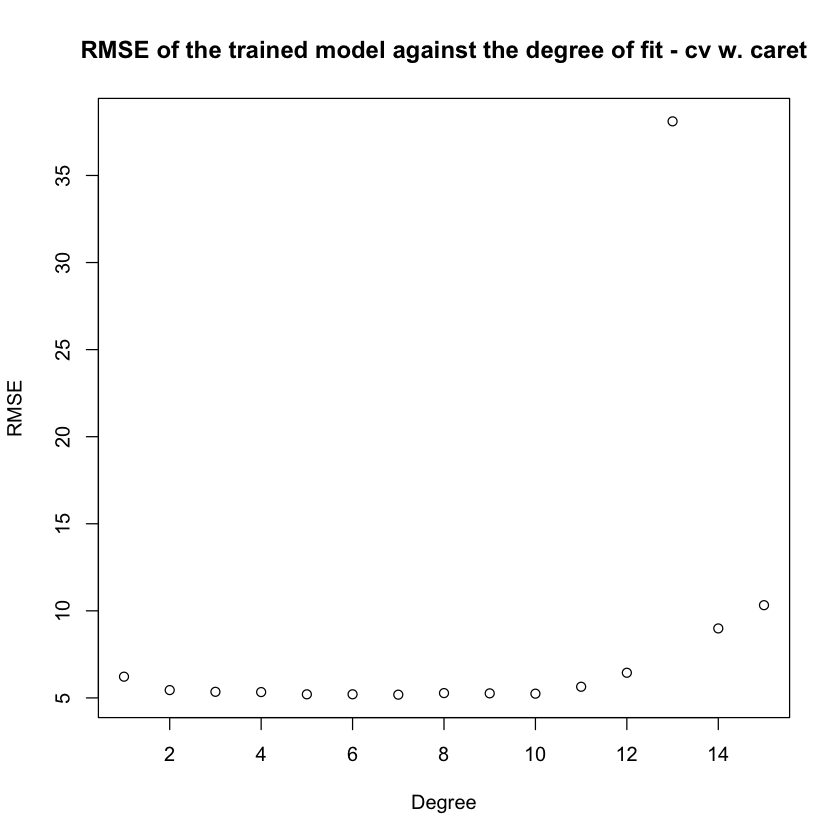

In [89]:
plot(c(1:15),rmse_value2, main="RMSE of the trained model against the degree of fit - cv w. caret", ylab="RMSE", xlab="Degree")

In [90]:
k.folds2 <- function(k,deg) {
    for (i in 1:deg) {
        folds <- createFolds(Boston$medv, k = k, list = TRUE, returnTrain = TRUE)
        for (j in 1:k) {
            model <- lm(medv ~ poly(lstat,i), data=Boston[folds[[j]],])
            predictions <- predict(object=model, newdata=Boston[-folds[[j]],])
            err <- c(err, rmse(predictions,Boston[-folds[[j]],]$medv))
        }
        rmse_value3 <- c(rmse_value3, mean(err))
    }
    rmse_value3
}

set.seed(5566)
rmse_value3 <- c()
rmse_value3 <- k.folds2(10,15)
rmse_value3

[1] 5.797750 5.657652 5.574616 5.496337 5.437292 5.404672 5.422091 5.405928
 [9] 5.386783 5.408744 5.425450 5.491382 5.700235 5.881929 6.954659

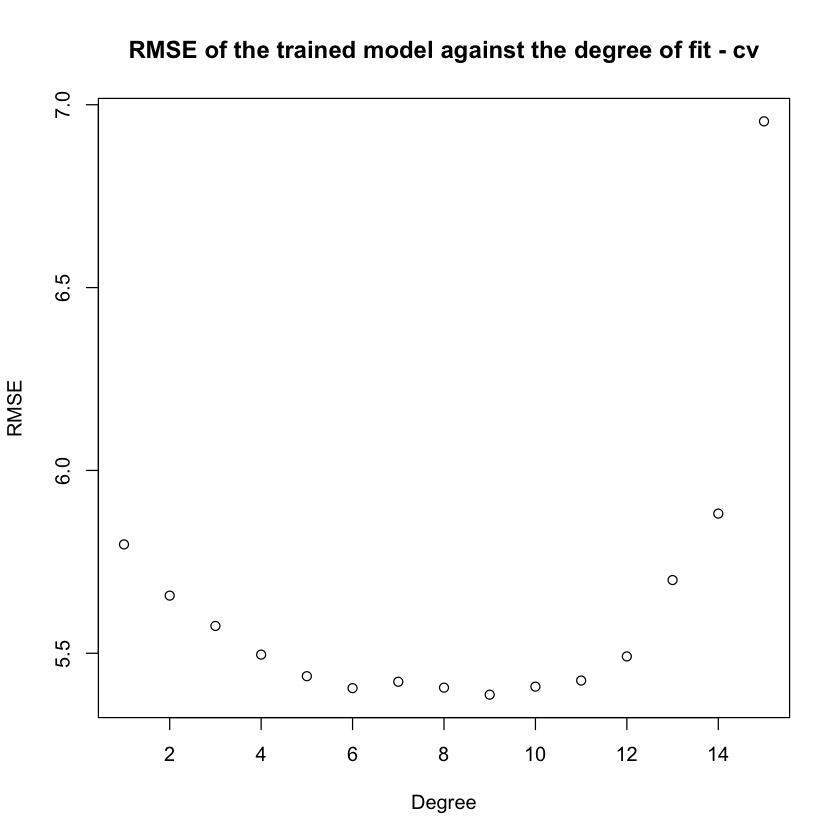

In [91]:
plot(c(1:15),rmse_value3, main="RMSE of the trained model against the degree of fit - cv", ylab="RMSE", xlab="Degree")

# 5) Regularization

### Ridge Regression

In [109]:
### ridge regression - 0.1
ridge_grid <- expand.grid(lambda = seq(0, .1, length = 15))
set.seed(100)
ridge_model <- train(medv ~ .,
                   data = Boston,
                   method = "ridge",
                   preProcess = c("center", "scale"),
                   tuneGrid = ridge_grid,
                   trControl = trainControl(method= "cv"))
ridge_model
# ridge_pred <- predict(ridge_model, testset)
# postResample(pred = ridge_pred,  obs = testset$medv)

Ridge Regression 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  lambda       RMSE      Rsquared   RMSE SD    Rsquared SD
  0.000000000  4.841861  0.7299384  0.6451659  0.07053065 
  0.007142857  4.839480  0.7303230  0.6497413  0.07176517 
  0.014285714  4.838999  0.7304902  0.6548439  0.07289572 
  0.021428571  4.839785  0.7305147  0.6602515  0.07393266 
  0.028571429  4.841461  0.7304417  0.6658337  0.07488616 
  0.035714286  4.843792  0.7303001  0.6715114  0.07576543 
  0.042857143  4.846626  0.7301090  0.6772347  0.07657854 
  0.050000000  4.849862  0.7298813  0.6829718  0.07733250 
  0.057142857  4.853431  0.7296261  0.6887017  0.07803337 
  0.064285714  4.857284  0.7293499  0.6944109  0.07868641 
  0.071428571  4.861386  0.7290575  0.7000903  0.07929622 
  0.078571429  4.865713  0.7287524  0.7057341  0.07986680

In [110]:
# ridge_grid <- expand.grid(lambda = seq(0, .001, length = 15))
ridge_grid <- expand.grid(lambda = c(1, 0.1, 0.01, 0.001))
set.seed(100)
ridge_model <- train(medv ~ .,
                   data = Boston,
                   method = "ridge",
                   preProcess = c("center", "scale"),
                   tuneGrid = ridge_grid,
                   trControl = trainControl(method= "cv"))
ridge_model
ridge_pred <- predict(ridge_model, testset)
postResample(pred = ridge_pred,  obs = testset$medv)

Ridge Regression 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  lambda  RMSE      Rsquared   RMSE SD    Rsquared SD
  0.001   4.841379  0.7300093  0.6457625  0.07071009 
  0.010   4.839102  0.7304109  0.6517343  0.07222930 
  0.100   4.879879  0.7277846  0.7224212  0.08137637 
  1.000   6.393033  0.6839727  1.1647402  0.09222020 

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was lambda = 0.01. 

RMSE  Rsquared 
3.8231923 0.7951684

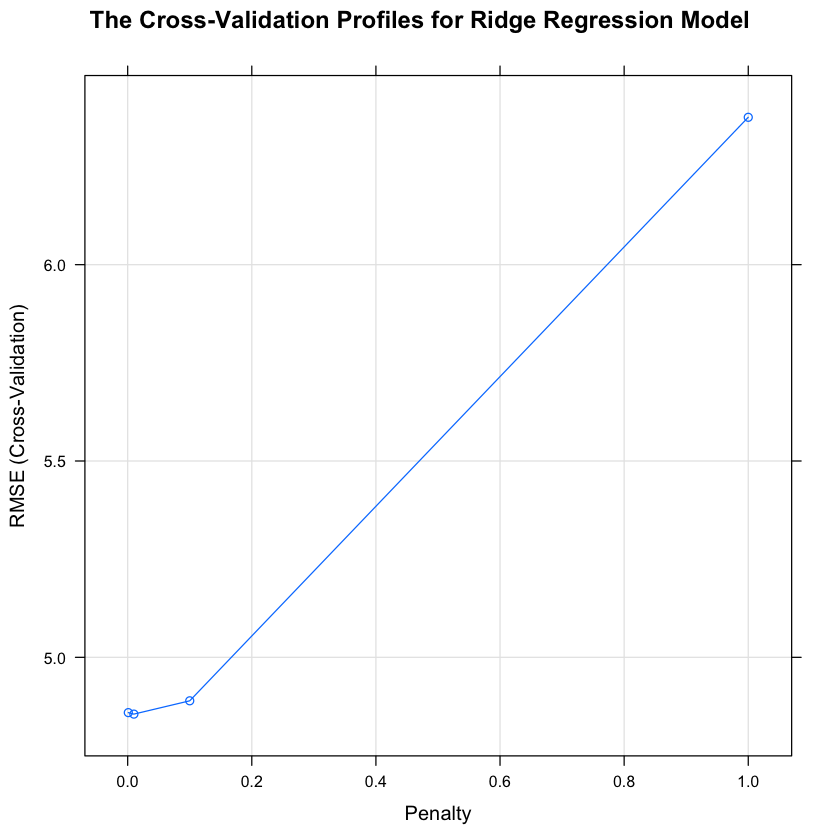

In [61]:
update(plot(ridge_model), xlab = "Penalty",
       main = "The Cross-Validation Profiles for Ridge Regression Model")

## Lasso

In [111]:
### lasso
# need prprocess to data
lasso_grid <- expand.grid(fraction = seq(.05, 1, length = 20))
set.seed(100)
lasso_model <- train(medv ~ .,
                     data = Boston,
                     method = "lasso",
                     preProcess = c("center", "scale"),
                     tuneGrid = lasso_grid,
                     trControl = trainControl(method= "cv"))
lasso_model
# lasso_pred <- predict(lasso_model, testset)
# postResample(pred = lasso_pred,  obs = testset$medv)

The lasso 

506 samples
 13 predictor

Pre-processing: centered (13), scaled (13) 
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 455, 456, 456, 455, 455, 455, ... 
Resampling results across tuning parameters:

  fraction  RMSE      Rsquared   RMSE SD    Rsquared SD
  0.05      8.348352  0.5735492  1.1327604  0.07246578 
  0.10      7.629564  0.6250124  1.0983416  0.07372327 
  0.15      6.970302  0.6394830  1.0497601  0.08124005 
  0.20      6.405943  0.6482776  0.9935616  0.08960572 
  0.25      5.932718  0.6696209  0.9265538  0.09270024 
  0.30      5.556784  0.6797869  0.8676191  0.09300290 
  0.35      5.324148  0.6861087  0.8104286  0.09459130 
  0.40      5.193702  0.6933912  0.7617466  0.09363027 
  0.45      5.131131  0.6998355  0.7240742  0.09146567 
  0.50      5.062285  0.7070568  0.7068524  0.08844347 
  0.55      5.009256  0.7122770  0.6896894  0.08574952 
  0.60      4.966524  0.7165712  0.6706342  0.08279629 
  0.65      4.933525  0.7202272  0.6593808  

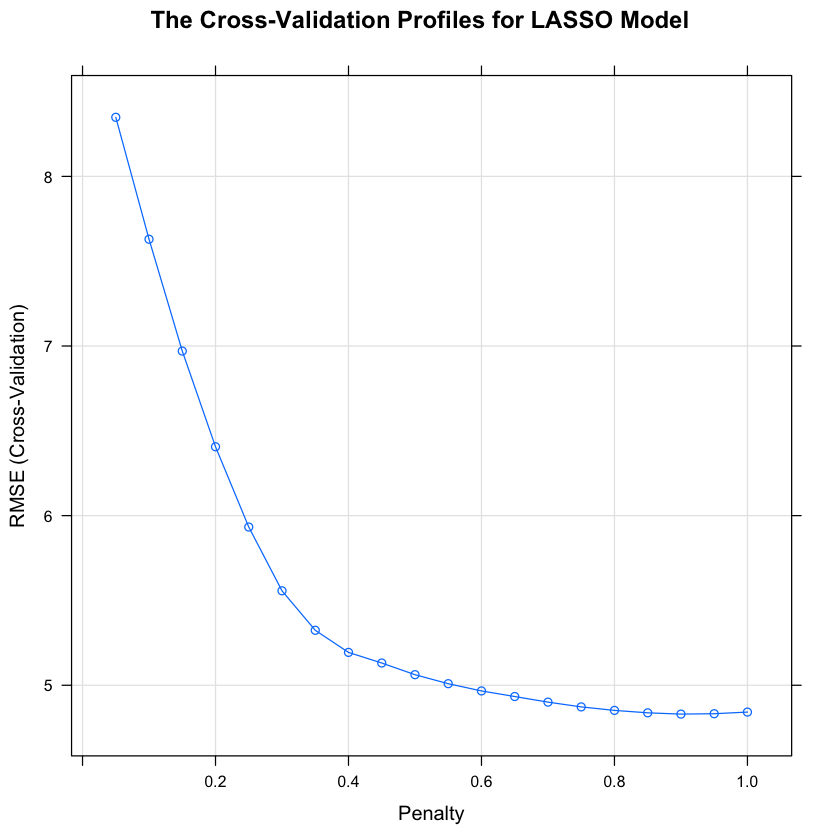

In [112]:
update(plot(lasso_model), xlab = "Penalty",
       main = "The Cross-Validation Profiles for LASSO Model")